In [1]:
#Project 3 :: Covid-19 Analysis and Visualization using Plotly Express
#import the three datasets from github

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import dataset - covid
url1 = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/covid.csv?raw=True'
covid = pd.read_csv(url1)
covid

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN,MSR
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN,
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN,FLK
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe,VAT


In [2]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [3]:
#cleaning the dataset
covid = covid.drop(['NewCases','NewDeaths','NewRecovered'],axis='columns')
covid = covid.rename(columns={'Country/Region':'Country'})
covid

,Country,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN,MSR
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN,
206,Falkland Islands,South America,3.489000e+03,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN,FLK
207,Vatican City,Europe,8.010000e+02,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe,VAT


In [4]:
#import datasets - covid_grouped, coviddeath

url2 = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/coviddeath.csv?raw=True'
coviddeath = pd.read_csv(url2)

url3 = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/covid_grouped.csv?raw=True'
covidgrouped = pd.read_csv(url3)




In [5]:
coviddeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12260 entries, 0 to 12259
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data as of                 12260 non-null  object 
 1   Start Week                 12260 non-null  object 
 2   End Week                   12260 non-null  object 
 3   State                      12260 non-null  object 
 4   Condition Group            12260 non-null  object 
 5   Condition                  12260 non-null  object 
 6   ICD10_codes                12260 non-null  object 
 7   Age Group                  12260 non-null  object 
 8   Number of COVID-19 Deaths  5354 non-null   float64
 9   Flag                       6906 non-null   object 
dtypes: float64(1), object(9)
memory usage: 957.9+ KB


In [6]:
coviddeath.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


In [7]:
#cleanup the data and reduce the memmory usage using category data type
coviddeath['Condition Group'].unique()
coviddeath['Condition Group'] = coviddeath['Condition Group'].astype('category')
coviddeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12260 entries, 0 to 12259
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Data as of                 12260 non-null  object  
 1   Start Week                 12260 non-null  object  
 2   End Week                   12260 non-null  object  
 3   State                      12260 non-null  object  
 4   Condition Group            12260 non-null  category
 5   Condition                  12260 non-null  object  
 6   ICD10_codes                12260 non-null  object  
 7   Age Group                  12260 non-null  object  
 8   Number of COVID-19 Deaths  5354 non-null   float64 
 9   Flag                       6906 non-null   object  
dtypes: category(1), float64(1), object(8)
memory usage: 874.5+ KB


In [8]:
covidgrouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


<Axes: xlabel='Continent', ylabel='TotalDeaths'>

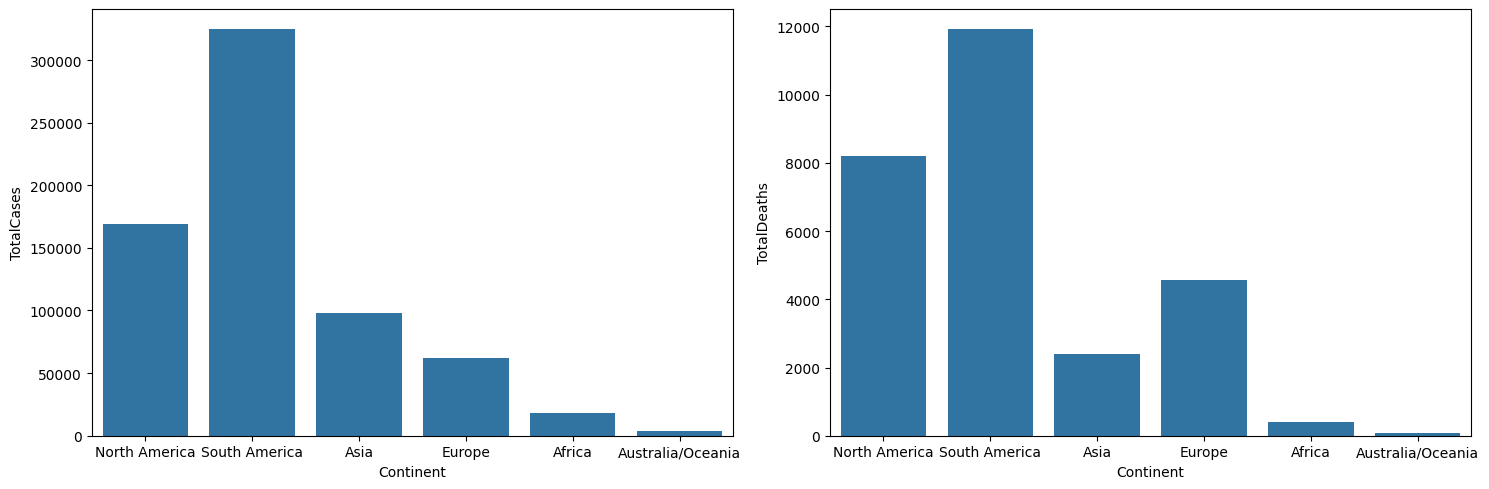

In [ ]:
#barplot Continent  vs TotalCases / Total Deaths 
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,2,3,4,tight_layout=True,figsize=(8,5))
#plt.figure(figsize=(8,5))
fig, (ax1,ax2) = plt.subplots(1,2,tight_layout=True,figsize=(15,5))
covidgroupby = covid.groupby('Continent')
sns.barplot(x='Continent',y='TotalCases',ax=ax1,data=covid,errorbar=None)
sns.barplot(x='Continent',y='TotalDeaths',ax=ax2,data=covid,errorbar=None)
#sns.barplot(x='Continent',y='TotalRecovered',ax=ax3,data=covid,errorbar=None)
#sns.barplot(x='Continent',y='TotalTests',ax=ax4,data=covid,errorbar=None)